## **📌 Tenserflow로 실습하는 CNN**

###  1. 기본 설정 ❗

> 분석에 필요한 라이브러리



In [13]:
import os 
import numpy as np 
import pandas as pd #csv 파일 I/O
import matplotlib.pyplot as plt #시각화

In [14]:
import tensorflow as tf #딥러닝 프레임워크
from tensorflow import keras

## 2. 데이터 불러오기 📂



> 데이터 불러오기



In [15]:
# 구글 드라이브 > MyDrive에 폴더 생성 후 데이터 직접 업로드
# > 코랩 파일에 들어와서 경로 복사 후 train_dir, test_dir에 할당
train_dir='/content/drive/MyDrive/zin/seg_train/seg_train'
test_dir='/content/drive/MyDrive/zin/seg_test/seg_test'

## 3. 이미지 데이터 전처리 

> target이 분류되어 있는 파일을 위한 label encoding



In [16]:
# 분석을 위한 이미지 크기 및 배치 사이즈 설정

IMG_SIZE = (150,150)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode = "categorical", #label 형태 설정
    batch_size=64)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode = "categorical", #label 형태 설정
    batch_size=64)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [51]:
# 타겟변수 확인
train_data.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [73]:
# 파일별로 분류된 이미지 라벨링 함수
def load_data():
    train_test = ['seg_train/seg_train', 'seg_test/seg_test']
    size = (150, 150)
    output = [] 
    for dataset in train_test:
        directory = "/content/drive/MyDrive/zin/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        images = images / 255.0 #데이터 정규화

        output.append((images, labels))

    return output

n_classes = 6

In [ ]:
(train_images, train_labels),(test_images, test_labels) = load_data()

In [67]:
# train_image 형태
train_images.shape

(14034, 150, 150, 3)

In [68]:
# test_image 형태
test_images.shape

(3000, 150, 150, 3)

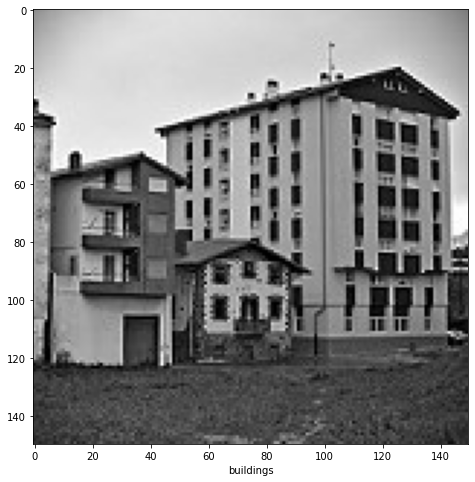

In [72]:
# 데이터 셋 중 하나의 이미지 확인
IMG_INDEX = 1126

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

# 3. CNN 실습 

> CNN 모델링



In [19]:
# 모델링
model_0 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # 데이터 정규화
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SIZE+(3,)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [20]:
# 모델 compile
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])




> 모델 예측



In [21]:
# 예측
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
220/220 [==============================] - 2431s 11s/step - loss: 1.1125 - accuracy: 0.5595 - val_loss: 1.0760 - val_accuracy: 0.5730
Epoch 2/10
220/220 [==============================] - 32s 145ms/step - loss: 0.8312 - accuracy: 0.6858 - val_loss: 0.7364 - val_accuracy: 0.7387
Epoch 3/10
220/220 [==============================] - 32s 142ms/step - loss: 0.6960 - accuracy: 0.7466 - val_loss: 0.7617 - val_accuracy: 0.7070
Epoch 4/10
220/220 [==============================] - 32s 143ms/step - loss: 0.6174 - accuracy: 0.7766 - val_loss: 0.5884 - val_accuracy: 0.7907
Epoch 5/10
220/220 [==============================] - 32s 145ms/step - loss: 0.5811 - accuracy: 0.7915 - val_loss: 0.5556 - val_accuracy: 0.8140
Epoch 6/10
220/220 [==============================] - 32s 145ms/step - loss: 0.5325 - accuracy: 0.8134 - val_loss: 0.5167 - val_accuracy: 0.8227
Epoch 7/10
220/220 [==============================] - 33s 148ms/step - loss: 0.5041 - accuracy: 0.8231 - val_loss: 0.5155 - val_ac

In [22]:
# 모델 요약 확인
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)       

# 4. CNN 모델 평가 

> 그래프를 통해 loss 값 확인

In [1]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Epoch에 따른 손실 정도 표로 나타내기
  plt.plot(epochs, loss, label='training_loss') #train loss
  plt.plot(epochs, val_loss, label='val_loss') #validation loss
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Epoch에 따른 정확도 표로 나타내기
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
    

plot_loss_curves(history_0)

NameError: ignored

In [24]:
# Let's evaluate the model
model_0.evaluate(test_data)

47/47 [==============================] - 4s 82ms/step - loss: 0.5203 - accuracy: 0.8147


[0.5203167796134949, 0.8146666884422302]